# Hypothesis testing of mean

## Excersize 1
### Calculate daily average air temperature and March DD0 over the years. DD0 is the sum of all positive daily temperature in March.

Hint: Use the dailyAvg() function. Use a for loop to calculate DD0 in each year

4382 4382 4382 4382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


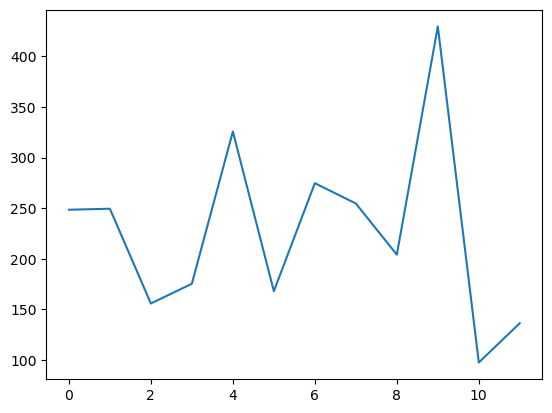

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Data/US-MMS_short.csv')
# print(df.head)

def dailyAvg(a,windowsize):
    Ndays = len(a)//windowsize
    a = a[0:Ndays*windowsize]
    a_daily = np.mean(np.reshape(a,[Ndays,windowsize]),axis=1)
    return a_daily


dailyT = dailyAvg(df['TA'].values,24)

## Generate an array for month and year respectively with the same length of dailyT 
Ndays = len(df)//24
df = df[:Ndays*24]

daily_month_id = np.array([df['MONTH'].iloc[i] for i in np.arange(0,len(df),24)])
daily_year_id = np.array([df['YEAR'].iloc[i] for i in np.arange(0,len(df),24)])
print(Ndays, len(dailyT),len(daily_month_id),len(daily_year_id))

## Use a for-loop over the years to calculate DD0 for each year


DD0 = np.zeros([12,]);print(DD0)
for i in range(12):
    marchT = dailyT[(daily_year_id==2003+i) * (daily_month_id==3)]
    #print(marchT)
#     print(np.sum(marchT[marchT>0]))
#     print(DD0[i])
    DD0[i] = np.sum(marchT[marchT>0])
#     print(DD0)
#     print(DD0[i])

    
## Plot the time series of DD0 over the years
plt.plot(DD0)

## Excersize 2
### A new sample set from climate model predictions show the average of predicted DD0 is 280 in future years.Based on the historical DD0 calculated above, do the available data suggest predicted mean DD0 is significantly higher than 280? 
Hint: Calculate the z-score and p-value. Use the module scipy.stats.norm to calculate pdf and cdf values of a Gaussian distribution.

226.55794097222224 87.36206103722108
2.119097475453756
0.017041115019454045


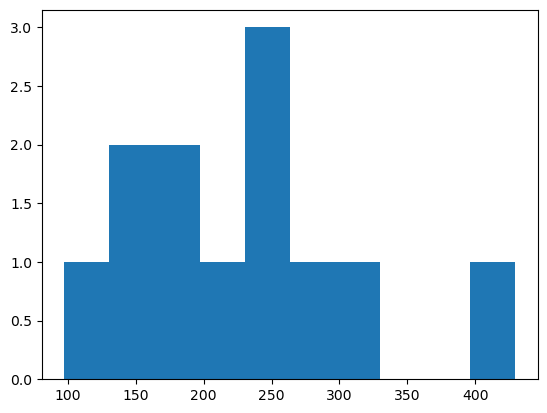

In [12]:
from scipy.stats import norm

## Plot a histogram of the DD0 calculated above
plt.figure()
plt.hist(DD0)

## Calculate the mean and standard deviation DD0
## Calculat the standard deviation of sample mean 
mu,sigma = np.mean(DD0),np.std(DD0)
print(mu,sigma)



## Calculate the z-score of new mean 280
z = (280-mu)/(sigma/np.sqrt(len(DD0))) # np.sqrt(12) is the same as 12**0.5
print(z)

## Calculate the cdf of z-score using norm.cdf(z,0,1)
z_cdf = norm.cdf(z,0,1)

## Calculate the p-value
p = 1-z_cdf

## Will you accect the null hypothesis? 
print(p)


In [14]:
## What is the p value for two-sided test?
p*2

0.03408223003890809

In [18]:
# What is the mean value beyond which 
# it will be considered significantly higher than u0? 

from scipy.stats import norm

# Given significance level (alpha), typically 0.05 for 95% confidence
alpha = 0.05

# Compute the critical z-score for the one-tailed test
z_critical = norm.ppf(1 - alpha)

# Calculate the critical mean beyond which it will be considered significantly higher than mu (u0)
# Formula: u_critical = mu + z_critical * (sigma / sqrt(n))
u_critical = mu + z_critical * (sigma / np.sqrt(len(DD0)))

# Print the critical mean value
print(f"The mean value beyond which it is considered significantly higher than u0 is: {u_critical:.2f}")

The mean value beyond which it is considered significantly higher than u0 is: 268.04
